<a href="https://colab.research.google.com/github/komzy/Demystifying-Data-Analytics-Course/blob/main/Week_3_Day1_Demo_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

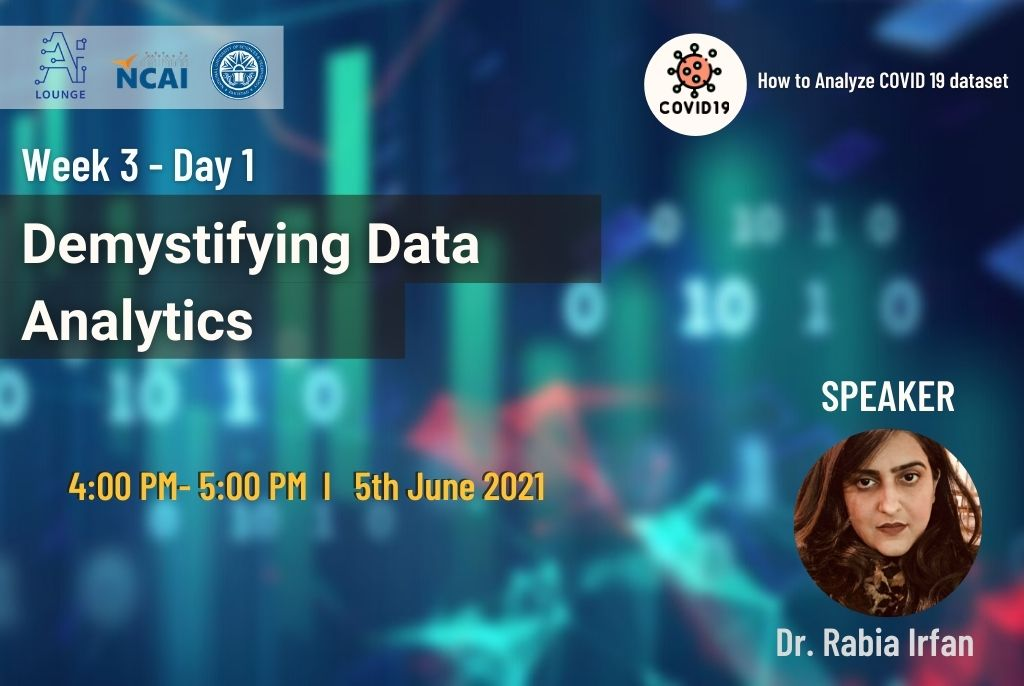

# **PART III - Data Analytics-Advanced Steps**


---


# **1. Course Roadmap**
As per the couse roadmap, the currert status is shown below:
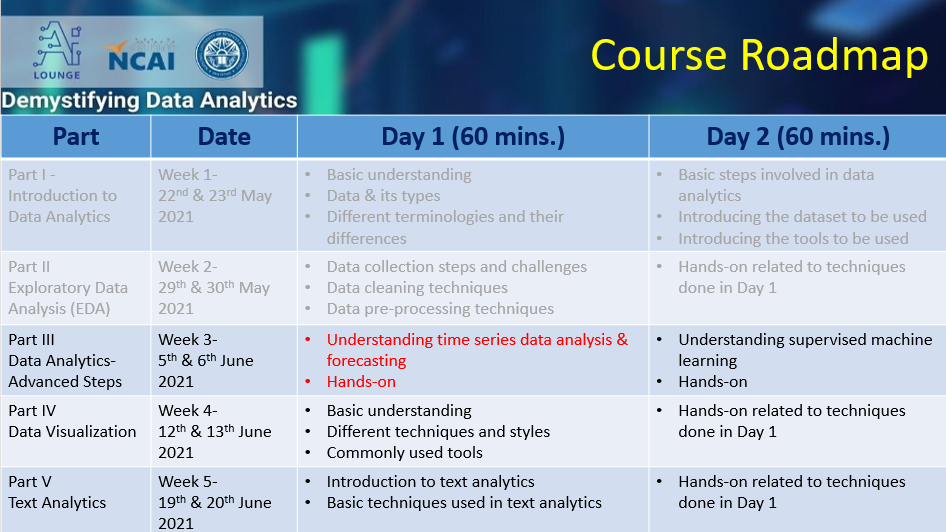

# **2. Week 3 Organization**
The content of Week 3 is divided in the following two parts:


1.   Time Series Analysis & Forecasting - **to be covered in Day 1**
2.   Prediction using supervised machine learning - **to be covered in Day 2**

# **3. Time Series Analysis & Forecasting**
These terminologies can be defined as:


*   Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. 
*   Time series forecasting is the use of a model to predict future values based on previously observed values.
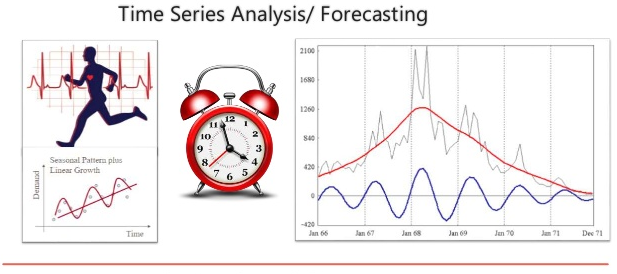

The use of time series models is twofold:


1.   Get an understanding of the factors and structure that produced the observed data
2.   Fit a model and proceed to forecasting, monitoring or even feedback and feed forward control.

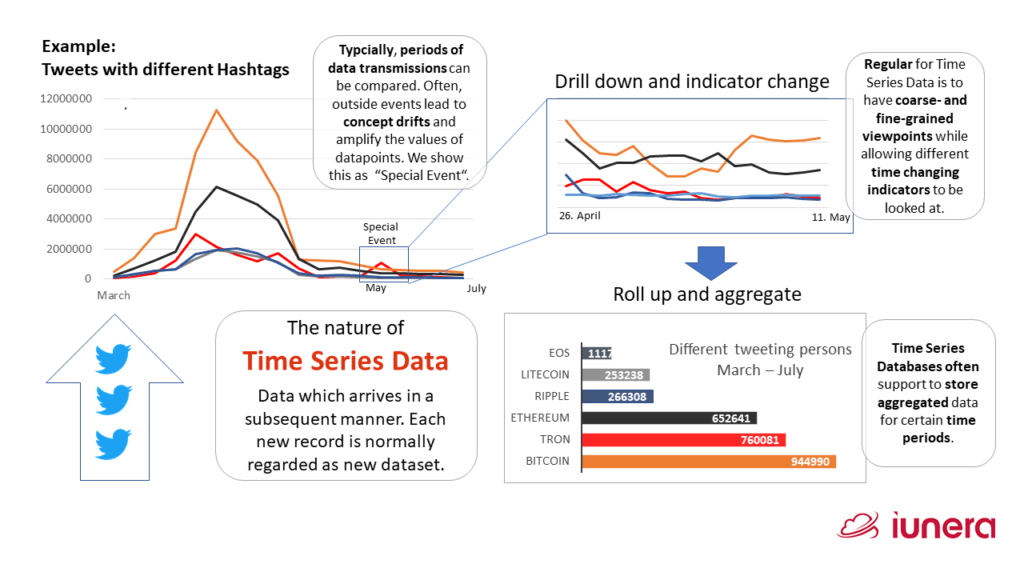
Time series data comprises of the following components:
time series components.png

Time Series Analysis is used for many applications such as:

1.  Inventory assessments
2.  Workload projections
3.  Weather patterns and forecasts
4.  Demographics projections
5.  Sales forecasting

An intereting read to get more insights about time series analysis and forecasting: https://www.iunera.com/kraken/fabric/time-series/


# **4. Time Series Analysis & Forecasting- Case study of COVID-19**
It is very interesting to observe that the nature of COVID-19 dataset we obtained from John Hopkins Center for Systems Science and Engineering (CSSE) is an "indirect" form of time series data. 

A typical view of time series data is shown below:
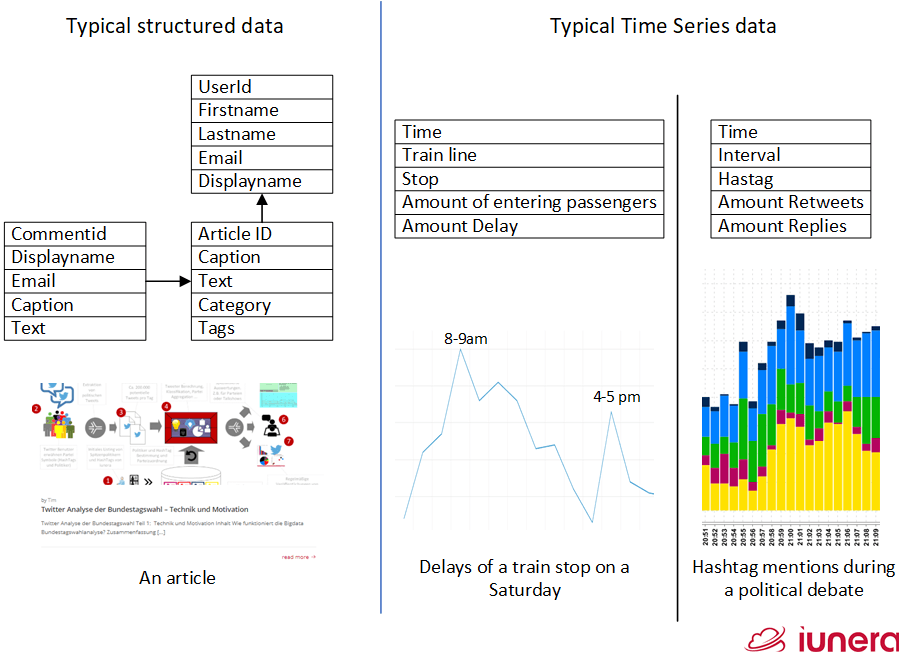

The word "indirect" means that the available data needs to be transformed by applying some data pre-prcessing techniques to bring it in a form suitable for time series analysis and forecasting. This type of data is indexed around time order. 

Figure below shows the data model for a time series data:
normal-data-model-vs-time-series-analysis-perspective-1024x576.png

So, let's begin our journey of converting the "indirect" representation of the COVID-19 dataset from John Hopkins CSSE in to "direct" form suitable for time series analysis. 

Converting from a form indexed around number sequnece given as:

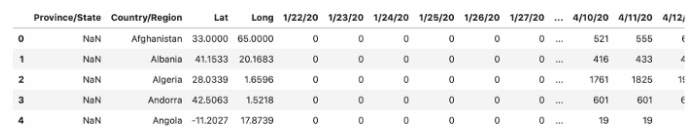

To a form indexed around the time order as shown below:

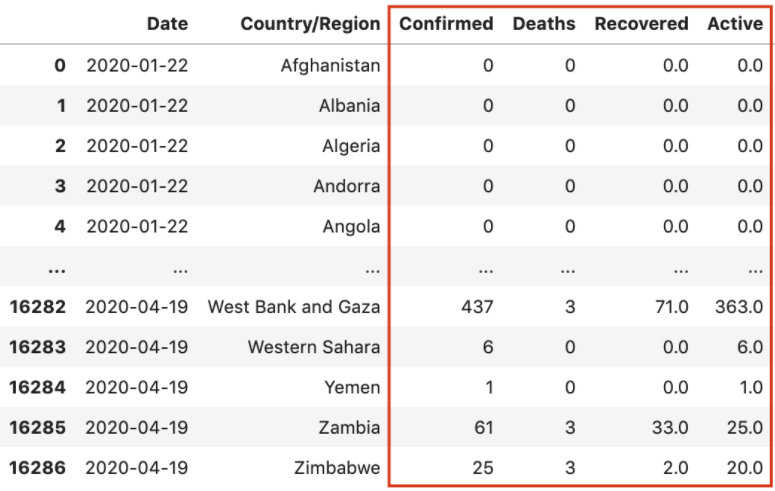

# **4a. Data Cleaning**

Let's convert the existing data 

In [1]:
#Importing the libraries
import pandas as pd

In [2]:
#Fetching the dataset
confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
death_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [3]:
print(confirmed_cases)
dates = confirmed_cases.columns[4:]
dates

    Province/State      Country/Region        Lat  ...  6/14/21  6/15/21  6/16/21
0              NaN         Afghanistan  33.939110  ...    91458    93272    93288
1              NaN             Albania  41.153300  ...   132461   132469   132476
2              NaN             Algeria  28.033900  ...   133742   134115   134458
3              NaN             Andorra  42.506300  ...    13826    13828    13836
4              NaN              Angola -11.202700  ...    36790    36921    37094
..             ...                 ...        ...  ...      ...      ...      ...
271            NaN             Vietnam  14.058324  ...    10881    11304    11794
272            NaN  West Bank and Gaza  31.952200  ...   311690   311948   312164
273            NaN               Yemen  15.552727  ...     6863     6864     6867
274            NaN              Zambia -13.133897  ...   113134   115824   118850
275            NaN            Zimbabwe -19.015438  ...    40077    40318    40556

[276 rows x 516

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/7/21', '6/8/21', '6/9/21', '6/10/21', '6/11/21', '6/12/21',
       '6/13/21', '6/14/21', '6/15/21', '6/16/21'],
      dtype='object', length=512)

In [4]:
#Melting the confirmed_cases data frame
#Bringing dates into row format from column format (transposes)
# unpivots dataframe from wide format to long format, unlike transpose it optionally leaves out certain columns as columns and only transpose some rows
confirmed_df = pd.melt(confirmed_cases, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name = 'Date', value_name = 'Confirmed')
confirmed_df

Province/State      Country/Region  ...     Date  Confirmed
0                 NaN         Afghanistan  ...  1/22/20          0
1                 NaN             Albania  ...  1/22/20          0
2                 NaN             Algeria  ...  1/22/20          0
3                 NaN             Andorra  ...  1/22/20          0
4                 NaN              Angola  ...  1/22/20          0
...               ...                 ...  ...      ...        ...
141307            NaN             Vietnam  ...  6/16/21      11794
141308            NaN  West Bank and Gaza  ...  6/16/21     312164
141309            NaN               Yemen  ...  6/16/21       6867
141310            NaN              Zambia  ...  6/16/21     118850
141311            NaN            Zimbabwe  ...  6/16/21      40556

[141312 rows x 6 columns]

In [8]:
#Melting the recovered_cases data frame
recovered_df = pd.melt(recovered_cases, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name = 'Date', value_name = 'Recovered')
recovered_df

Province/State      Country/Region  ...     Date  Recovered
0                 NaN         Afghanistan  ...  1/22/20          0
1                 NaN             Albania  ...  1/22/20          0
2                 NaN             Algeria  ...  1/22/20          0
3                 NaN             Andorra  ...  1/22/20          0
4                 NaN              Angola  ...  1/22/20          0
...               ...                 ...  ...      ...        ...
133627            NaN             Vietnam  ...  6/16/21       4590
133628            NaN  West Bank and Gaza  ...  6/16/21     304777
133629            NaN               Yemen  ...  6/16/21       3781
133630            NaN              Zambia  ...  6/16/21     100423
133631            NaN            Zimbabwe  ...  6/16/21      37075

[133632 rows x 6 columns]

In [7]:
#Melting the death_cases data frame
death_df = pd.melt(death_cases, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], value_vars=dates, var_name = 'Date', value_name = 'Death')
death_df

Province/State      Country/Region  ...     Date  Death
0                 NaN         Afghanistan  ...  1/22/20      0
1                 NaN             Albania  ...  1/22/20      0
2                 NaN             Algeria  ...  1/22/20      0
3                 NaN             Andorra  ...  1/22/20      0
4                 NaN              Angola  ...  1/22/20      0
...               ...                 ...  ...      ...    ...
141307            NaN             Vietnam  ...  6/16/21     61
141308            NaN  West Bank and Gaza  ...  6/16/21   3544
141309            NaN               Yemen  ...  6/16/21   1351
141310            NaN              Zambia  ...  6/16/21   1492
141311            NaN            Zimbabwe  ...  6/16/21   1640

[141312 rows x 6 columns]

In [9]:
# Merging through Left join confirmed_df with and death_df
complete_tb = confirmed_df.merge(
right=death_df,
how='left',
on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'] #keys for joining
)
complete_tb

Province/State      Country/Region        Lat  ...     Date Confirmed  Death
0                 NaN         Afghanistan  33.939110  ...  1/22/20         0      0
1                 NaN             Albania  41.153300  ...  1/22/20         0      0
2                 NaN             Algeria  28.033900  ...  1/22/20         0      0
3                 NaN             Andorra  42.506300  ...  1/22/20         0      0
4                 NaN              Angola -11.202700  ...  1/22/20         0      0
...               ...                 ...        ...  ...      ...       ...    ...
141307            NaN             Vietnam  14.058324  ...  6/16/21     11794     61
141308            NaN  West Bank and Gaza  31.952200  ...  6/16/21    312164   3544
141309            NaN               Yemen  15.552727  ...  6/16/21      6867   1351
141310            NaN              Zambia -13.133897  ...  6/16/21    118850   1492
141311            NaN            Zimbabwe -19.015438  ...  6/16/21     40556   1640

[141312 rows x 7 columns]

In [10]:
# Merging through Left joininh complete_tb and recovered_df
complete_tb = complete_tb.merge(
right=recovered_df,
how='left',
on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long'] #keys for joining
)
complete_tb

Province/State      Country/Region  ...  Death  Recovered
0                 NaN         Afghanistan  ...      0        0.0
1                 NaN             Albania  ...      0        0.0
2                 NaN             Algeria  ...      0        0.0
3                 NaN             Andorra  ...      0        0.0
4                 NaN              Angola  ...      0        0.0
...               ...                 ...  ...    ...        ...
141307            NaN             Vietnam  ...     61     4590.0
141308            NaN  West Bank and Gaza  ...   3544   304777.0
141309            NaN               Yemen  ...   1351     3781.0
141310            NaN              Zambia  ...   1492   100423.0
141311            NaN            Zimbabwe  ...   1640    37075.0

[141312 rows x 8 columns]

--Want to remember whats left join, see below:

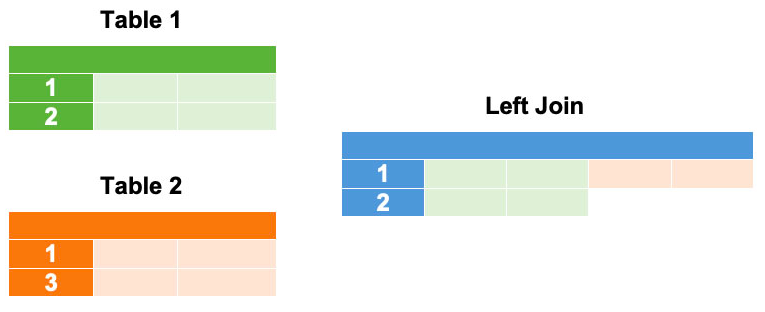

--An interesting read on different ways of joining data frames in pandas: https://realpython.com/pandas-merge-join-and-concat/

In [12]:
#Checking for null values
complete_tb.isnull().sum()

Province/State    97280
Country/Region        0
Lat                1024
Long               1024
Date                  0
Confirmed             0
Death                 0
Recovered         10752
dtype: int64

In [13]:
#Filling the null values
complete_tb['Death'] = complete_tb['Death'].fillna(0)
complete_tb['Recovered'] = complete_tb['Recovered'].fillna(0)
print('After filling the complete_tb:')
complete_tb.isnull().sum()

After filling the complete_tb:


Province/State    97280
Country/Region        0
Lat                1024
Long               1024
Date                  0
Confirmed             0
Death                 0
Recovered             0
dtype: int64

In [14]:
#Dropping the NAN columns
complete_tb = complete_tb.dropna(axis = 1, how ='any')
print('After dropping the NAN columns from complete_tb:')
complete_tb.isnull().sum()

After dropping the NAN columns from complete_tb:


Country/Region    0
Date              0
Confirmed         0
Death             0
Recovered         0
dtype: int64

In [15]:
#Converting date column into date time format
print('Before conversion:', complete_tb.dtypes['Date'])
complete_tb['Date'] = pd.to_datetime(complete_tb['Date'])
print('After conversion:', complete_tb.dtypes['Date'])

Before conversion: object
After conversion: datetime64[ns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Adding the Active cases
complete_tb['Active'] = complete_tb['Confirmed'] - complete_tb['Death'] - complete_tb['Recovered']
complete_tb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Country/Region       Date  Confirmed  Death  Recovered   Active
0              Afghanistan 2020-01-22          0      0        0.0      0.0
1                  Albania 2020-01-22          0      0        0.0      0.0
2                  Algeria 2020-01-22          0      0        0.0      0.0
3                  Andorra 2020-01-22          0      0        0.0      0.0
4                   Angola 2020-01-22          0      0        0.0      0.0
...                    ...        ...        ...    ...        ...      ...
141307             Vietnam 2021-06-16      11794     61     4590.0   7143.0
141308  West Bank and Gaza 2021-06-16     312164   3544   304777.0   3843.0
141309               Yemen 2021-06-16       6867   1351     3781.0   1735.0
141310              Zambia 2021-06-16     118850   1492   100423.0  16935.0
141311            Zimbabwe 2021-06-16      40556   1640    37075.0   1841.0

[141312 rows x 6 columns]

In [20]:
complete_grouped = complete_tb.groupby(['Date', 'Country/Region'])['Confirmed', 'Death', 'Recovered', 'Active'].sum()
complete_grouped

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Confirmed  Death  Recovered   Active
Date       Country/Region                                          
2020-01-22 Afghanistan                 0      0        0.0      0.0
           Albania                     0      0        0.0      0.0
           Algeria                     0      0        0.0      0.0
           Andorra                     0      0        0.0      0.0
           Angola                      0      0        0.0      0.0
...                                  ...    ...        ...      ...
2021-06-16 Vietnam                 11794     61     4590.0   7143.0
           West Bank and Gaza     312164   3544   304777.0   3843.0
           Yemen                    6867   1351     3781.0   1735.0
           Zambia                 118850   1492   100423.0  16935.0
           Zimbabwe                40556   1640    37075.0   1841.0

[98816 rows x 4 columns]

In [21]:
complete_grouped = complete_tb.groupby(['Date', 'Country/Region'])['Confirmed', 'Death', 'Recovered', 'Active'].sum().reset_index()
complete_grouped

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Date      Country/Region  Confirmed  Death  Recovered   Active
0     2020-01-22         Afghanistan          0      0        0.0      0.0
1     2020-01-22             Albania          0      0        0.0      0.0
2     2020-01-22             Algeria          0      0        0.0      0.0
3     2020-01-22             Andorra          0      0        0.0      0.0
4     2020-01-22              Angola          0      0        0.0      0.0
...          ...                 ...        ...    ...        ...      ...
98811 2021-06-16             Vietnam      11794     61     4590.0   7143.0
98812 2021-06-16  West Bank and Gaza     312164   3544   304777.0   3843.0
98813 2021-06-16               Yemen       6867   1351     3781.0   1735.0
98814 2021-06-16              Zambia     118850   1492   100423.0  16935.0
98815 2021-06-16            Zimbabwe      40556   1640    37075.0   1841.0

[98816 rows x 6 columns]

In [23]:
complete_grouped.to_csv('COVID-19-timeseries-clean-complete.csv')

# **4b. Interactive Data Visualization**

Let's explore two new visualization libraries 'Altair' (https://altair-viz.github.io/user_guide/marks.html) and 'Plotly'(https://plotly.com/python/) to visualize the time series data interactively.

In [28]:
#altair gives interactive graphs very simply
import altair as alt
import plotly.express as px 
complete_clean_data = pd.read_csv('COVID-19-timeseries-clean-complete.csv', parse_dates=['Date'])

In [32]:
#analyze only a few countries
countries = ['Pakistan', 'India', 'United Kingdom', 'China', 'France', 'Italy']
selected_data = complete_clean_data[complete_clean_data['Country/Region'].isin(countries)]
selected_data.dtypes['Date']

dtype('<M8[ns]')

In [35]:
#a. Interactive Scatter & Bar Plots
interval = alt.selection_interval()

circle = alt.Chart(selected_data).mark_circle().encode(
    x='Date',
    y='Country/Region',
    color=alt.condition(interval, 'Country/Region', alt.value('lightgray')),
    size=alt.Size('Confirmed:Q',
        scale=alt.Scale(range=[0, 3000]),
        legend=alt.Legend(title='Confirmed Cases')
    ) 
).properties(
    width=1000,
    height=300,
    title ='Comparing Confirmed Cases for Different Countries over the Course of Time',
    selection=interval
)

bars = alt.Chart(selected_data).mark_bar().encode(
    y='Country/Region',
    color='Country/Region',
    x='sum(Confirmed):Q'
).properties(
    width=1000, height=200 , title='Cummulative Number of Confirmed Cases for Different Countries wrt Relations shown in the above Graph'
).transform_filter(
    interval
)

circle & bars

alt.VConcatChart(...)

In [37]:
#b. Bar Chart over Time
pak = complete_clean_data[complete_clean_data['Country/Region'] == 'Pakistan']
ind = complete_clean_data[complete_clean_data['Country/Region'] == 'India']
uk = complete_clean_data[complete_clean_data['Country/Region'] == 'United Kingdom']
ch = complete_clean_data[complete_clean_data['Country/Region'] == 'China']
fran = complete_clean_data[complete_clean_data['Country/Region'] == 'France']
it = complete_clean_data[complete_clean_data['Country/Region'] == 'Italy']

graph_pak=alt.Chart(pak).mark_bar().encode(
    x='Date',
    y='Confirmed',
    color = 'Confirmed'
).properties(
    width=700,
    title = 'Confirmed Cases-Pakistan'
)

graph_ind= alt.Chart(ind).mark_bar().encode(
    x='Date',
    y='Confirmed',
    color = 'Confirmed'
).properties(
    width=700,
    title = 'Confirmed Cases-India'
)

graph_uk= alt.Chart(uk).mark_bar().encode(
    x='Date',
    y='Confirmed',
    color = 'Confirmed'
).properties(
    width=700,
    title = 'Confirmed Cases-UK'
)

graph_it= alt.Chart(it).mark_bar().encode(
    x='Date',
    y='Confirmed',
    color = 'Confirmed'
).properties(
    width=700,
    title = 'Confirmed Cases-Italy'
)


graph_ch= alt.Chart(ch).mark_bar().encode(
    x='Date',
    y='Confirmed',
    color = 'Confirmed'
).properties(
    width=700,
    title = 'Confirmed Cases-China'
)

graph_fran= alt.Chart(fran).mark_bar().encode(
    x='Date',
    y='Confirmed',
    color = 'Confirmed'
).properties(
    width=700,
    title = 'Confirmed Cases-France'
)

graph_pak & graph_ind & graph_uk & graph_it & graph_ch & graph_fran


alt.VConcatChart(...)

In [ ]:
#c. Choropleth- World-wide Confirmed Cases
figure = px.choropleth(complete_clean_data, locations = 'Country/Region', locationmode='country names', color='Confirmed')
figure.update_layout(title='COVID-19 Spread Across the Globe', template='plotly')
figure.show()

--Currently, for Pakistan number of confirmed cases is low as compared to top trend countries however, we are still unable to find a flattening trend in the COVID-19 behaviour in our country.

--If we can predict values in the future then may be we can take some strict measures at the moment in order to avoid devastations.

# **4c. Predicting Future Values-Using FB Prophet**
For the scope of today's class, we will learn the use of Facebook Prophet for prediction of time series data. Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

For time based forecasting, prophet offers many advantages as it is:


1.   accurate and fast
2.   fully automatic
3.   tunable
4.   available in R and Python

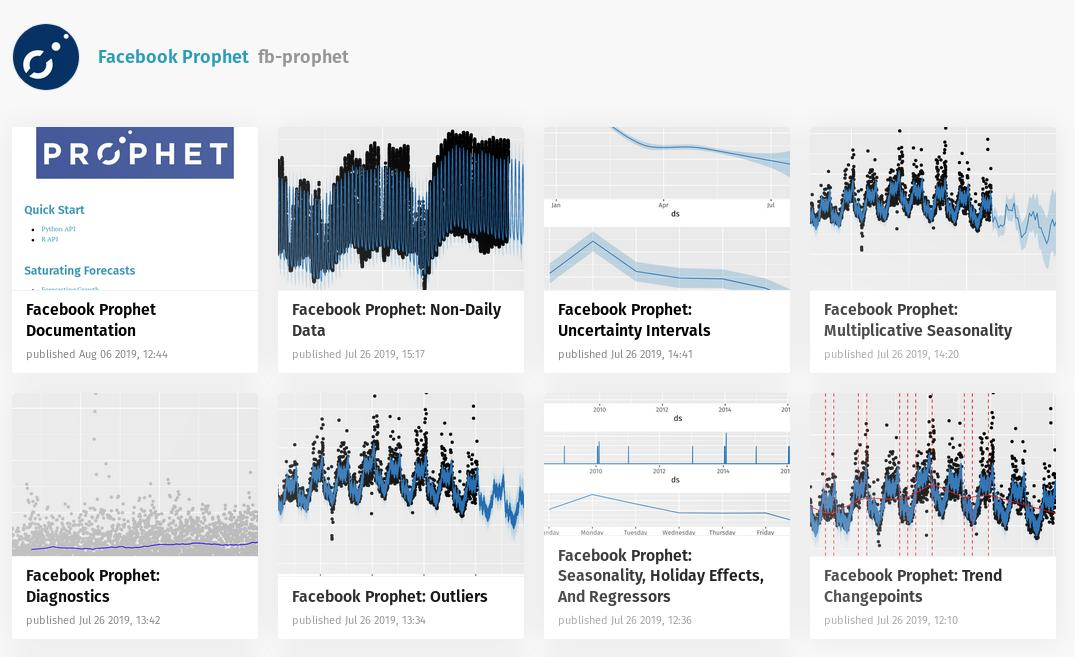

In [ ]:
#Importing the library
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

--The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.


--Therefore, we need to convert the data in a required format.

In [ ]:
#Bringing data in the required format
confirm_pak = complete_clean_data[complete_clean_data['Country/Region']=='Pakistan']
confirm_pak_perday = confirm_pak.groupby("Date")[['Confirmed']].sum().reset_index()
confirm_pak_perday.columns = ['ds', 'y'] #Renaming
confirm_pak_perday

ds       y
0   2020-01-22       0
1   2020-01-23       0
2   2020-01-24       0
3   2020-01-25       0
4   2020-01-26       0
..         ...     ...
495 2021-05-31  922824
496 2021-06-01  924667
497 2021-06-02  926695
498 2021-06-03  928588
499 2021-06-04  930511

[500 rows x 2 columns]

In [ ]:
#Setting the model parameters
model = Prophet(interval_width=0.95, daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True) #significance level = 0.95
model.fit(confirm_pak_perday)
future = model.make_future_dataframe(periods=15)

In [ ]:
#Predicting the future values
forecast = model.predict(future)
forecast

ds          trend  ...  multiplicative_terms_upper          yhat
0   2020-01-22   11207.342342  ...                         0.0 -1.488937e+03
1   2020-01-23   12100.222083  ...                         0.0 -9.413439e+02
2   2020-01-24   12993.101824  ...                         0.0 -6.164709e+02
3   2020-01-25   13885.981565  ...                         0.0 -1.383039e+02
4   2020-01-26   14778.861306  ...                         0.0  1.922202e+02
..         ...            ...  ...                         ...           ...
510 2021-06-15  847598.791450  ...                         0.0  9.873902e+05
511 2021-06-16  849675.245201  ...                         0.0  9.924767e+05
512 2021-06-17  851751.698951  ...                         0.0  9.974716e+05
513 2021-06-18  853828.152702  ...                         0.0  1.002255e+06
514 2021-06-19  855904.606452  ...                         0.0  1.007185e+06

[515 rows x 22 columns]

In [ ]:
#Plotting the predictions
plot = model.plot(forecast, xlabel='Date', ylabel='Confirmed Cases')
plt.title('Pakistan\'s Coronavirus Forecast for Next 15 days')
plt.show()

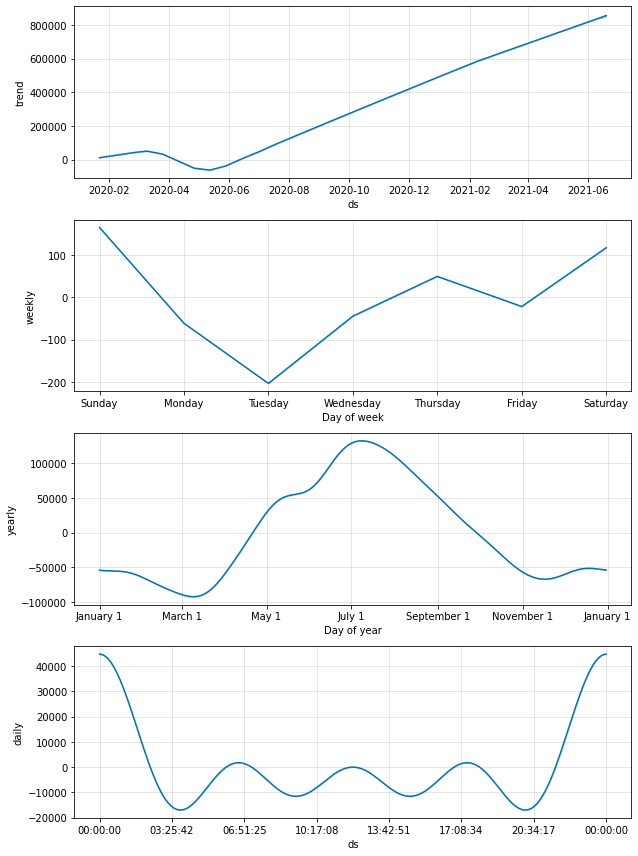

In [ ]:
model.plot_components(forecast)
plt.show()

# **Conclusion**
--From the analysis, we observed that Pakistan COVID-19 cases are relatively lesser than the top trending countries especially our neighboring country India.

--However, the prediction model that we learnt through Facebook Prophet, we observed that Pakistan COVID-19 cases are to be increased.

--In order to bring this trend down and to flatten the curve of COVID-19 spread, **LET's ALL GET VACCINATED!!**

download.jpg







> **Question:** How can you day the model that you learned through Prophet is good enough? Can you check its accuracy at the moment?



# **Useful Resources**
Peophet Time Series Forecasting: https://towardsdatascience.com/getting-started-with-facebook-prophet-20eccb25b06b 